In [2]:
## Importing required Python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
#Loading the data
insurance = pd.read_csv('/home/ex5/21MIS1006/new_insurance_data.csv')
insurance.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [5]:
#processing the data to fill the missing data 
insurance.isna().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [41]:
#affter filling data in blank spaces
insurance['age'] = insurance['age'].fillna (insurance['age'].mean())
insurance['bmi'] = insurance['bmi'].fillna (insurance['bmi'].mean())
insurance['Claim_Amount'] = insurance['Claim_Amount'].fillna(insurance['Claim_Amount'].mean())
insurance['past_consultations'] = insurance['past_consultations'].fillna(insurance['past_consultations'].mean()) 
insurance['num_of_steps'] = insurance['num_of_steps'].fillna(insurance['num_of_steps'].mean())
insurance['Hospital_expenditure'] = insurance['Hospital_expenditure'].fillna (insurance['Hospital_expenditure'].median())
insurance['NUmber_of_past_hospitalizations'] = insurance['NUmber_of_past_hospitalizations'].fillna(insurance['NUmber_of_past_hospitalizations'].median())
insurance['Anual_Salary'] = insurance['Anual_Salary'].fillna(insurance['Anual_Salary'].median())
insurance.isna().sum()

age                                0
sex                                0
bmi                                0
children                           5
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

In [51]:
## splitting the data
## X insurance.drop(['bmi'], axis=1)
from sklearn.model_selection import train_test_split
X = insurance.iloc[:,0]  # age
y = insurance.iloc[:,2]  # bmi
print(X.shape)
print(y.shape)

(1338,)
(1338,)


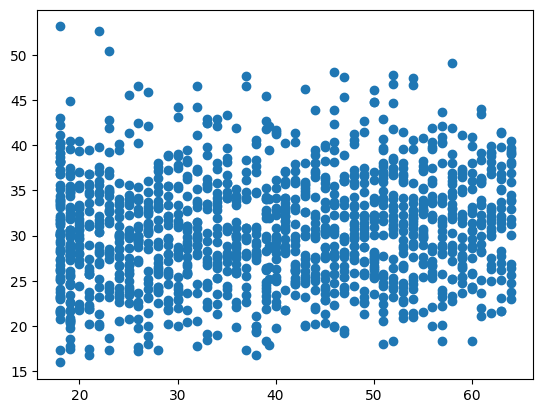

In [52]:
plt.scatter(X,y)
plt.show()

In [53]:
#building the model 
m=0
c=0
L=0.0001     #learning rate , the step size
epochs=1000  # no.of iterations
n=float(len(X))
for i in range (len(X)):
    Y_pred= m*X + c
    D_m= (-2/n) * sum(X * (y - Y_pred)) # derivative of the loss with respect to m
    D_c= (-2/n) * sum(y - Y_pred)       # derivative of the loss with respect to c
    m= m - L * D_m
    c= c - L * D_c
print(m,c)

0.6784505131956572 0.8658797929185549


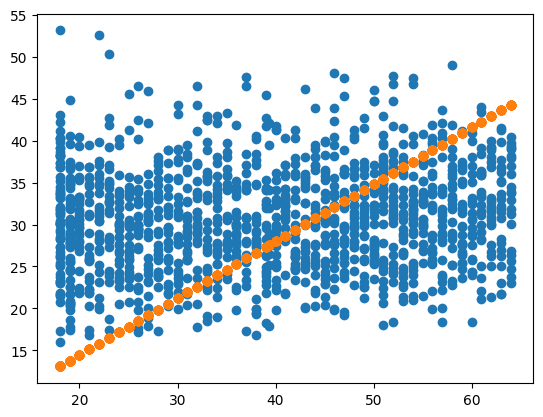

In [54]:
#making predictions
# predicted value in y and actual in blue 
Y_pred = m*X + c   # equation of line 
plt.scatter(X,y)
plt.scatter(X,Y_pred)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

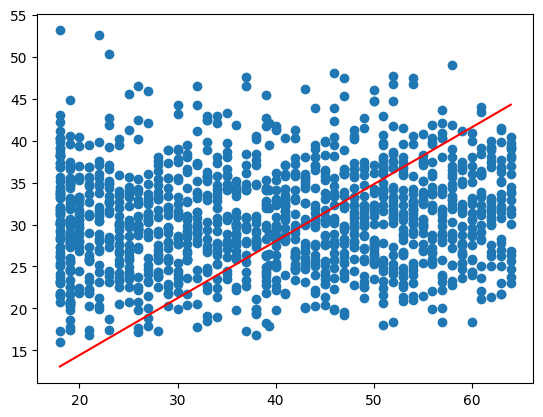

In [55]:
#the minimum and maximum value is connected is shown below 
plt.scatter(X,y)
plt.plot([ min(X), max(X)], [ min(Y_pred), max(Y_pred)], color = 'red')
plt.show